# 3 Pointers Made against shooting.csv

### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import pearsonr
import itertools

pd.set_option("display.max_columns", None)

### Set working directory

In [2]:
# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

# Change working directory
os.chdir('/Users/tyler/OneDrive/Documents/Python/NBA')

# Print working directory
cwd = os.getcwd()
print(f'Directory: {cwd}')

Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA\backend\analysis
Directory: C:\Users\tyler\OneDrive\Documents\Python\NBA


## Exploratory Data Analysis

### Import data

In [3]:
df = pd.read_csv('backend/data/shooting.csv').drop(['Unnamed: 0'], axis=1)

### Basic exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      194138 non-null  object 
 1   visitor   194138 non-null  object 
 2   home      194138 non-null  object 
 3   team      194138 non-null  int64  
 4   quarter   194138 non-null  object 
 5   fg        194138 non-null  int64  
 6   fga       194138 non-null  int64  
 7   fg_perc   194138 non-null  float64
 8   2p        194138 non-null  int64  
 9   2pa       194138 non-null  int64  
 10  2p_perc   194135 non-null  float64
 11  3p        194138 non-null  int64  
 12  3pa       194138 non-null  int64  
 13  3p_perc   192676 non-null  float64
 14  efg_perc  194138 non-null  float64
 15  ast       194138 non-null  int64  
 16  ast_perc  194116 non-null  float64
dtypes: float64(5), int64(8), object(4)
memory usage: 25.2+ MB


In [5]:
df.sample(5)

,date,visitor,home,team,quarter,fg,fga,fg_perc,2p,2pa,2p_perc,3p,3pa,3p_perc,efg_perc,ast,ast_perc
158718,"Sat, Nov 3, 2018",Utah Jazz,Denver Nuggets,0,total,33,81,0.407,27,50,0.540,6,31,0.194,0.444,22,0.667
180067,"Thu, Mar 5, 2020",Denver Nuggets,Charlotte Hornets,0,q4,13,19,0.684,11,14,0.786,2,5,0.400,0.737,7,0.538
25862,"Tue, Apr 22, 2008",Dallas Mavericks,New Orleans Hornets,0,q1,11,19,0.579,9,15,0.600,2,4,0.500,0.632,8,0.727
116215,"Fri, Apr 10, 2015",Sacramento Kings,Oklahoma City Thunder,0,q2,9,21,0.429,6,13,0.462,3,8,0.375,0.500,7,0.778
146102,"Mon, Nov 13, 2017",Los Angeles Lakers,Phoenix Suns,1,q4,8,23,0.348,7,17,0.412,1,6,0.167,0.370,2,0.250


In [6]:
# Convert 'date' column to Date object
df['date'] = pd.to_datetime(df['date'])

# Conver 'team' column to Team Name
df['team'] = np.where(df['team'], df['home'], df['visitor'])

# Define statistics
stats = ['fg', 'fga', 'fg_perc', '2p', '2pa', '2p_perc', '3p', '3pa', '3p_perc', 'efg_perc', 'ast', 'ast_perc']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194138 entries, 0 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      194138 non-null  datetime64[ns]
 1   visitor   194138 non-null  object        
 2   home      194138 non-null  object        
 3   team      194138 non-null  object        
 4   quarter   194138 non-null  object        
 5   fg        194138 non-null  int64         
 6   fga       194138 non-null  int64         
 7   fg_perc   194138 non-null  float64       
 8   2p        194138 non-null  int64         
 9   2pa       194138 non-null  int64         
 10  2p_perc   194135 non-null  float64       
 11  3p        194138 non-null  int64         
 12  3pa       194138 non-null  int64         
 13  3p_perc   192676 non-null  float64       
 14  efg_perc  194138 non-null  float64       
 15  ast       194138 non-null  int64         
 16  ast_perc  194116 non-null  float64    

In [7]:
total_df = df[df['quarter'] == 'total']
q1_df = df[df['quarter'] == 'q1']
q2_df = df[df['quarter'] == 'q2']
q3_df = df[df['quarter'] == 'q3']
q4_df = df[df['quarter'] == 'q4']

In [8]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38288 entries, 4 to 194137
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      38288 non-null  datetime64[ns]
 1   visitor   38288 non-null  object        
 2   home      38288 non-null  object        
 3   team      38288 non-null  object        
 4   quarter   38288 non-null  object        
 5   fg        38288 non-null  int64         
 6   fga       38288 non-null  int64         
 7   fg_perc   38288 non-null  float64       
 8   2p        38288 non-null  int64         
 9   2pa       38288 non-null  int64         
 10  2p_perc   38288 non-null  float64       
 11  3p        38288 non-null  int64         
 12  3pa       38288 non-null  int64         
 13  3p_perc   38288 non-null  float64       
 14  efg_perc  38288 non-null  float64       
 15  ast       38288 non-null  int64         
 16  ast_perc  38288 non-null  float64       
dtypes: datetime

### 3 Pointer's Made vs Year (--)

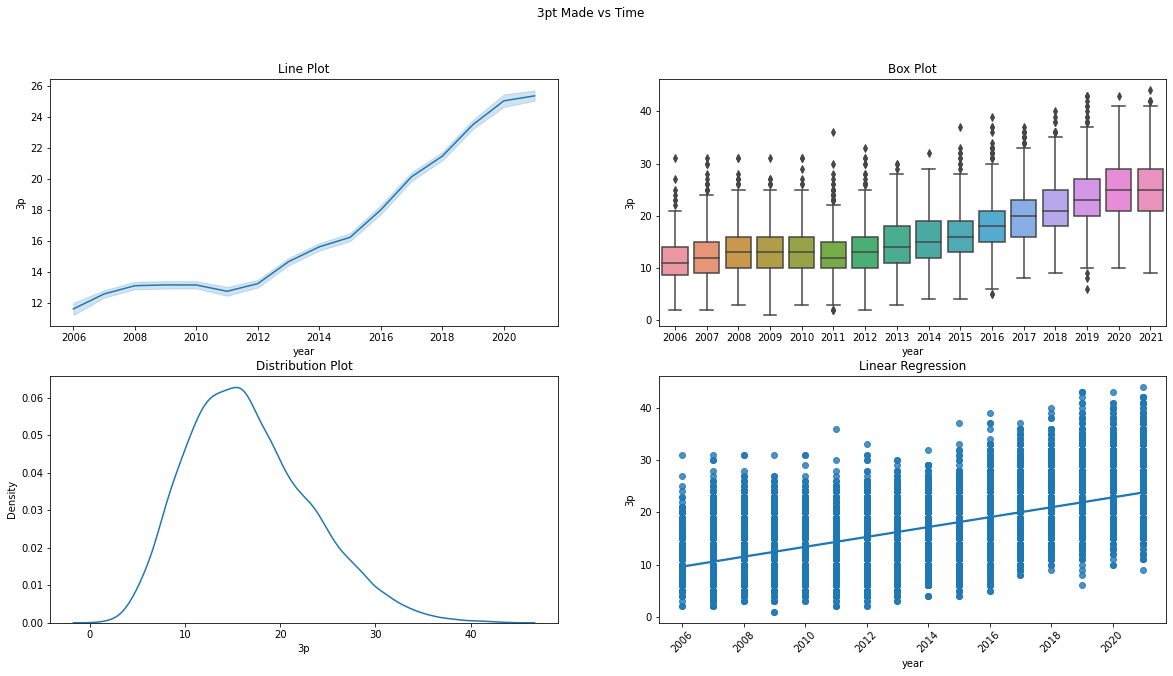

In [9]:
# Groupby and sum all statistics
totals = total_df.groupby(['date', 'visitor', 'home']).sum().reset_index()

# Create year and month columns
totals['year'] = totals['date'].dt.year
totals['month'] = totals['date'].dt.month

# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals, ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals, ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals, ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals, ax=ax[1, 1]).set(title='Linear Regression')

plt.show()

### 3 Pointer's Made vs Year (2015 - current)

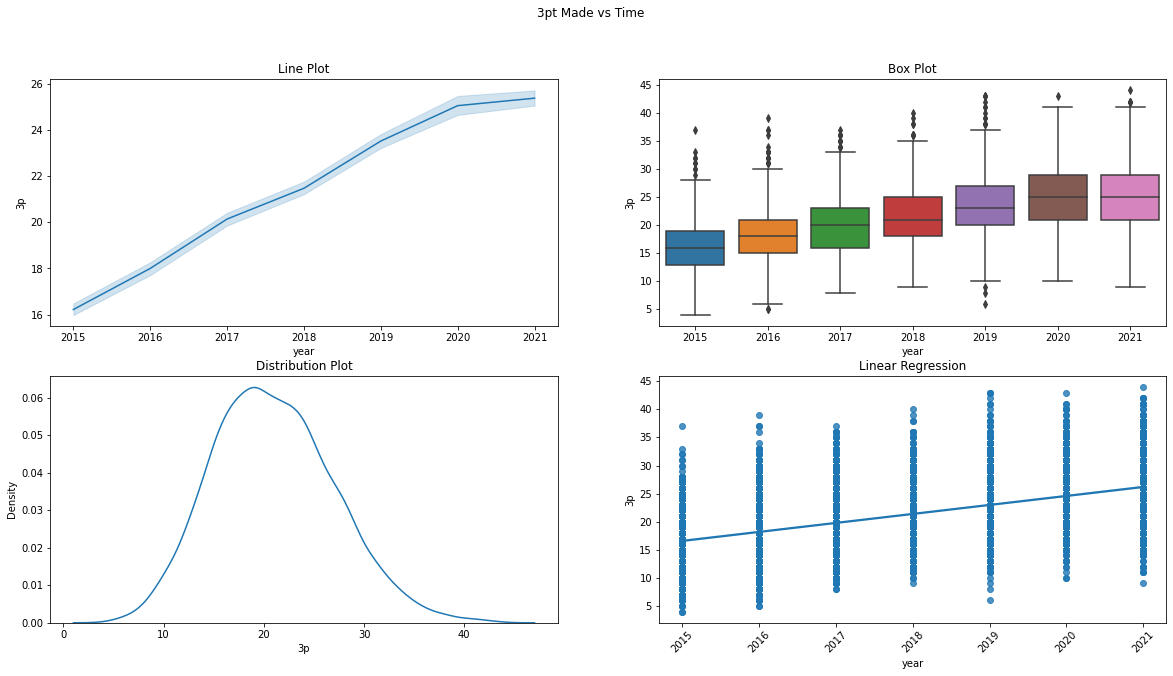

In [10]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs Time')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over Time
chart = sns.lineplot(x='year', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over Time
chart = sns.boxplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
plt.xticks(rotation=45)

# Plot distribution plot of Total 3pt Made over Time
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over Time
chart = sns.regplot(x='year', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1]).set(title='Linear Regression')

plt.xticks(rotation=45)
plt.show()

### 3 Pointer's Made vs FGA (2015 - current)

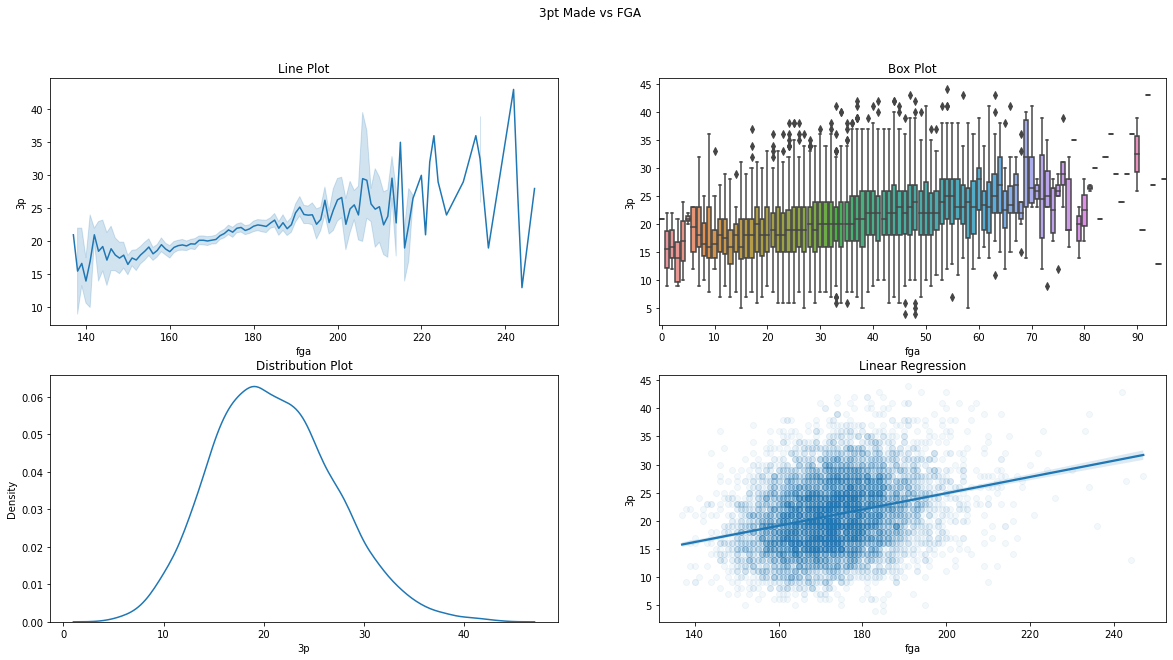

In [11]:
# Change plot size
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.suptitle('3pt Made vs FGA')
fig = plt.gcf()

year = 2015

# Plot lineplot of Total 3pt Made over FGA
chart = sns.lineplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax= ax[0, 0]).set(title='Line Plot')

# Plot boxplot of Total 3pt Made over FGA
chart = sns.boxplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[0, 1]).set(title= 'Box Plot')
ax[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0, 1].xaxis.set_major_formatter(ticker.ScalarFormatter())

# Plot distribution plot of Total 3pt Made over FGA
chart = sns.kdeplot(x='3p', data=totals[totals['year'] >= year], ax=ax[1,0]).set(title='Distribution Plot')

# Plot linearregression of Total 3pt Made over FGA
chart = sns.regplot(x='fga', y='3p', data=totals[totals['year'] >= year], ax=ax[1, 1], scatter_kws={'alpha':0.05}).set(title='Linear Regression')

plt.show()

# Dataframe of team's last 15 performances

In [12]:
# Totals
total_df = df[df['quarter'] == 'total'].copy()

# Return ten lastest dates team played
def last_15_date(team, date):
    schedule = total_df[total_df['team'] == team].sort_values(by='date').reset_index()
    date_index = schedule[schedule['date'] == date].index[0]
    if date_index - 15 < 0:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    else:
        date_1, date_2 = schedule.iloc[date_index - 1]['date'], schedule.iloc[date_index - 2]['date']
        date_3, date_4 = schedule.iloc[date_index - 3]['date'], schedule.iloc[date_index - 4]['date']
        date_5, date_6 = schedule.iloc[date_index - 5]['date'], schedule.iloc[date_index - 6]['date']
        date_7, date_8 = schedule.iloc[date_index - 7]['date'], schedule.iloc[date_index - 8]['date']
        date_9, date_10 = schedule.iloc[date_index - 9]['date'], schedule.iloc[date_index - 10]['date']
        date_11, date_12 = schedule.iloc[date_index - 11]['date'], schedule.iloc[date_index - 12]['date']
        date_13, date_14 = schedule.iloc[date_index - 13]['date'], schedule.iloc[date_index - 14]['date']
        date_15 = schedule.iloc[date_index - 15]['date']
        return date_1, date_2, date_3, date_4, date_5, date_6, date_7, date_8, date_9, date_10, date_11, date_12, date_13, date_14, date_15

total_df['dates'] = total_df.apply(lambda x: last_15_date(x.team, x.date), axis=1)
total_df['date_1'], total_df['date_2'] = total_df['dates'].apply(lambda x: x[0]), total_df['dates'].apply(lambda x: x[1])
total_df['date_3'], total_df['date_4'] = total_df['dates'].apply(lambda x: x[2]), total_df['dates'].apply(lambda x: x[3])
total_df['date_5'], total_df['date_6'] = total_df['dates'].apply(lambda x: x[4]), total_df['dates'].apply(lambda x: x[5])
total_df['date_7'], total_df['date_8'] = total_df['dates'].apply(lambda x: x[6]), total_df['dates'].apply(lambda x: x[7])
total_df['date_9'], total_df['date_10'] = total_df['dates'].apply(lambda x: x[8]), total_df['dates'].apply(lambda x: x[9])
total_df['date_11'], total_df['date_12'] = total_df['dates'].apply(lambda x: x[10]), total_df['dates'].apply(lambda x: x[11])
total_df['date_13'], total_df['date_14'] = total_df['dates'].apply(lambda x: x[12]), total_df['dates'].apply(lambda x: x[13])
total_df['date_15'] = total_df['dates'].apply(lambda x: x[14])

In [13]:
# X and y column names to merge on
x_cols = ['date', 'team'] + stats

last_15_games = total_df.copy()
last_15_games.loc[:, 'target'] = last_15_games.loc[:, '3p']
X = total_df[x_cols].copy()

# Dataframe of target (3pt made by each team) and of variables (last 5 games stats for each team)
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
for date in dates:
    last_15_games = pd.merge(last_15_games, X, left_on=['date' + date, 'team'], right_on=['date', 'team'], how='left', suffixes=('', date))

In [14]:
# Calculate z-score
def z_score(value, mean, std):
    return (value - mean) / std

In [15]:
# Calculate perc difference
def perc_diff(value, mean):
    return (value - mean) / mean

### Last 15 Performances (Unweighted)

In [16]:
dates = ['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10', '_11', '_12', '_13', '_14', '_15']
cols = ['date', 'visitor', 'home', 'team', 'target'] + \
    [tup[0] + tup[1] for tup in list(itertools.product(stats, dates))] 

last_15_games_unweighted = last_15_games[cols].copy()

# Calculate mean for each stat over a team's last performance
for stat in stats:
    last_15_games_unweighted[stat] = 0
    for date in dates:
        last_15_games_unweighted[stat] = last_15_games_unweighted[stat] + last_15_games_unweighted[stat + date]
    
    last_15_games_unweighted[stat] = last_15_games_unweighted[stat] / len(dates)
    
# Calculate standard deviation for each stat over a team's performance
for stat in stats:
    last_15_games_unweighted[stat + '_std'] = 0
    for date in dates:
        last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] + \
                                                    ((last_15_games_unweighted[stat + date] - last_15_games_unweighted[stat]) ** 2)
    
    last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] / len(dates)
    last_15_games_unweighted[stat + '_std'] = last_15_games_unweighted[stat + '_std'] ** .5

# Feature engineer trends
for stat in stats:
    last_15_games_unweighted[stat + '_trend'] = 0
    for date in dates[:10]:
        last_15_games_unweighted[stat + '_trend'] = last_15_games_unweighted[stat + '_trend'] + \
                                        z_score(last_15_games_unweighted[stat + date], last_15_games_unweighted[stat], last_15_games_unweighted[stat + '_std']).fillna(0)
    
    last_15_games_unweighted[stat + '_trend'] = last_15_games_unweighted[stat + '_trend'] / len(dates[:10])

last_15_games_unweighted = last_15_games_unweighted.groupby(['date', 'visitor', 'home']).aggregate(['mean', 'sum'])

last_15_game_cols = [col 
                    for col in last_15_games_unweighted.columns
                    if (col[0] == 'target' and col[1] == 'sum') or \
                       (col[0] in stats and col[1] == 'sum' and '_perc' not in col[0]) or \
                       (col[0] in stats and col[1] == 'mean' and '_perc' in col[0]) or \
                       ('_trend' in col[0] and col[1] == 'sum')]

last_15_games_unweighted = last_15_games_unweighted[last_15_game_cols].dropna(axis=0)
last_15_games_unweighted.columns = [col[0] for col in last_15_games_unweighted.columns]
last_15_games_unweighted.head()

target         fg  \
date       visitor         home                                        
2006-11-28 Indiana Pacers  Portland Trail Blazers      13  33.933333   
           New York Knicks Chicago Bulls                9  35.466667   
2006-11-29 Indiana Pacers  Golden State Warriors       18  74.133333   
           New York Knicks Cleveland Cavaliers         13  35.000000   
           Orlando Magic   Seattle SuperSonics          8  72.733333   

                                                          fga   fg_perc  \
date       visitor         home                                           
2006-11-28 Indiana Pacers  Portland Trail Blazers   73.666667  0.460733   
           New York Knicks Chicago Bulls            78.933333  0.450933   
2006-11-29 Indiana Pacers  Golden State Warriors   162.800000  0.455100   
           New York Knicks Cleveland Cavaliers      77.200000  0.454733   
           Orlando Magic   Seattle SuperSonics     155.933333  0.469033   

                                                          2p         2pa  \
date       visitor         home                                            
2006-11-28 Indiana Pacers  Portland Trail Blazers  29.200000   58.933333   
           New York Knicks Chicago Bulls           30.400000   63.533333   
2006-11-29 Indiana Pacers  Golden State Warriors   59.600000  122.000000   
           New York Knicks Cleveland Cavaliers     30.466667   62.666667   
           Orlando Magic   Seattle SuperSonics     61.733333  125.133333   

                                                    2p_perc         3p  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.496600   4.733333   
           New York Knicks Chicago Bulls           0.480467   5.066667   
2006-11-29 Indiana Pacers  Golden State Warriors   0.490333  14.533333   
           New York Knicks Cleveland Cavaliers     0.487533   4.533333   
           Orlando Magic   Seattle SuperSonics     0.494967  11.000000   

                                                         3pa   3p_perc  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers  14.733333  0.326267   
           New York Knicks Chicago Bulls           15.400000  0.309200   
2006-11-29 Indiana Pacers  Golden State Warriors   40.800000  0.358433   
           New York Knicks Cleveland Cavaliers     14.533333  0.293667   
           Orlando Magic   Seattle SuperSonics     30.800000  0.355267   

                                                   efg_perc        ast  \
date       visitor         home                                          
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.492600  17.266667   
           New York Knicks Chicago Bulls           0.482267  17.533333   
2006-11-29 Indiana Pacers  Golden State Warriors   0.500067  46.600000   
           New York Knicks Cleveland Cavaliers     0.483533  17.333333   
           Orlando Magic   Seattle SuperSonics     0.504367  37.466667   

                                                   ast_perc  fg_trend  \
date       visitor         home                                         
2006-11-28 Indiana Pacers  Portland Trail Blazers  0.511867 -0.124086   
           New York Knicks Chicago Bulls           0.492067 -0.057114   
2006-11-29 Indiana Pacers  Golden State Warriors   0.630933  0.204044   
           New York Knicks Cleveland Cavaliers     0.493800  0.036927   
           Orlando Magic   Seattle SuperSonics     0.514233 -0.097934   

                                                   fga_trend  fg_perc_trend  \
date       visitor         home                                               
2006-11-28 Indiana Pacers  Portland Trail Blazers  -0.015127      -0.156202   
           New York Knicks Chicago Bulls           -0.049841       0.004318   
2006-11-29 Indiana Pacers  Golden State Warriors    0.024531       0.211849   
           New York Kni

## Correlations

In [17]:
corr_df = pd.DataFrame()

# Correlations for last 15 game stats vs 3pt made (unweighted)
for col in last_15_games_unweighted:
    corr_p = pearsonr(last_15_games_unweighted['target'], last_15_games_unweighted[col])
    row = {'stat': col, 'corr': round(corr_p[0], 2), 'p-value': round(corr_p[1], 2)}
    corr_df = corr_df.append(row, ignore_index=True)
    
# Print correlation
corr_df = corr_df[corr_df['p-value'] < .05].drop(['p-value'], axis=1).sort_values(['corr'], axis=0, ascending=False)
corr_df

,corr,stat
0,1.00,target
7,0.73,3p
8,0.73,3pa
10,0.51,efg_perc
6,0.50,2p_perc
2,0.46,fga
1,0.46,fg
11,0.42,ast
12,0.18,ast_perc
9,0.17,3p_perc


## Save dataframe with significantly correlated stats

In [25]:
stats = corr_df[corr_df['corr'].abs() >= .4]['stat']
df = last_15_games_unweighted[stats]
df.to_csv('backend/data/inputs/shooting.csv')